In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals.csv')

In [19]:
df.set_index('Month_Beginning',inplace=True)
df.sort_index(inplace=True)

In [20]:
df.head()

,route,routename,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal
Month_Beginning,,,,,,
01/01/2001,1,Indiana/Hyde Park,6982.6,0.0,0.0,153617
01/01/2001,97,Skokie,3681.4,2066.7,1167.5,95096
01/01/2001,96,Lunt,1343.2,0.0,0.0,29550
01/01/2001,95W,West 95th,5162.6,4526.5,2556.7,144468
01/01/2001,95E,93rd-95th,5787.1,4530.5,3014.3,160511


In [16]:
df['route'].nunique()

184

<AxesSubplot:xlabel='Month_Beginning'>

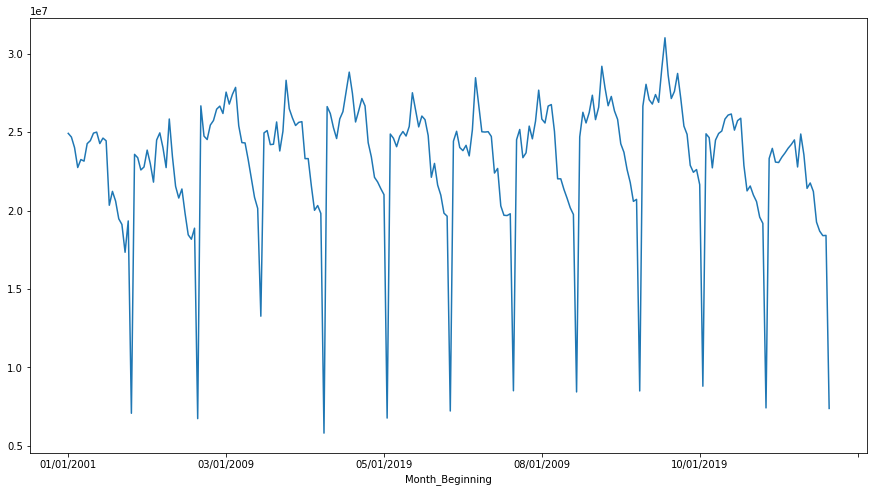

In [29]:
plt.figure(figsize=(15,8))
df.groupby('Month_Beginning').sum()['MonthTotal'].plot()

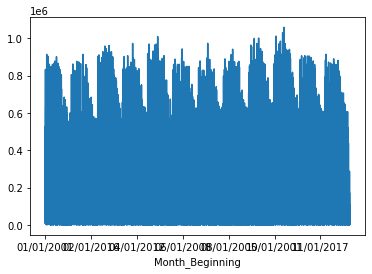

In [21]:
df['MonthTotal'].plot();

In [8]:
df_1 = df[df['route']=='1'].copy()

In [9]:
df_1['Month_Beginning'] = pd.to_datetime(df_1['Month_Beginning'])

In [11]:
df_1.set_index('Month_Beginning',inplace=True)
df_1.sort_index(inplace=True)

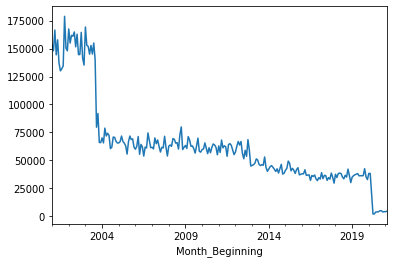

In [15]:
df_1['MonthTotal'].plot();

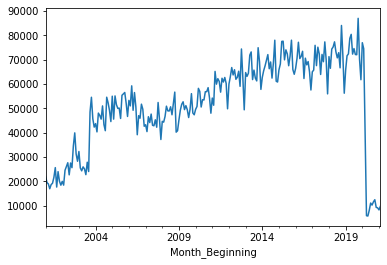

In [17]:
df_2 = df[df['route']=='2'].copy()
df_2['Month_Beginning'] = pd.to_datetime(df_2['Month_Beginning'])
df_2.set_index('Month_Beginning',inplace=True)
df_2.sort_index(inplace=True)
df_2['MonthTotal'].plot();

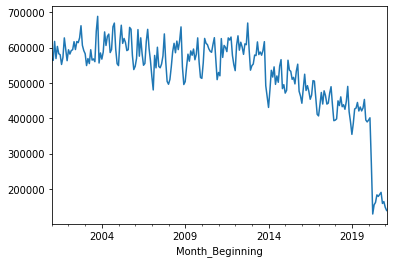

In [18]:
df_3 = df[df['route']=='3'].copy()
df_3['Month_Beginning'] = pd.to_datetime(df_3['Month_Beginning'])
df_3.set_index('Month_Beginning',inplace=True)
df_3.sort_index(inplace=True)
df_3['MonthTotal'].plot();